# Planet Discovery and the Possibility of Extraterrestrial Life
   #### This jupyter notebook serves and the main file for the analysis. Within this file, we will expore NASA's APIs in order to answer the following question: What makes a planet habitiable and how were these planets discovered?
   #### From this question, and after data exploration, we broke down our analysis into 4 smaller questions which is be analyzed in this notebook:
####      1.	How many planets have discovered each year from 2010 to 2020?
####      2.	Which facilities have discovered the most planets?
####      3.	How many planets fall within the ranges given by the PHL data?
####      4.	Which variable (mass, radius, flux, and temperature) has the highest correlation to ESI?

   #### Based on the following analysis, we find that the number of planets discovered only slightly increased from 2010 to 2020, but had major spikes in 2014 and 2016. We also found that Kepler Observatory in India by far, found the most planets. We also found 2 planets that are similar to earth. Finally, we explored which variables impact the Earth Silarity Index (ESI) score the most. 


In [1]:
#Importing Required Dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import g_key
import gmaps
import os
import scipy.stats as stats
from scipy.stats import linregress
from IPython.display import Image

In [2]:
# Pulling in required data
composite_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars'
api_key = "&apikey="

In [3]:
# Pulling necessary columns from NASA CSV and cleaning data with null values
nasa_original_df = pd.read_csv(composite_url)
nasa_filter_df = nasa_original_df[["fpl_hostname","fpl_letter","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age"]]
nasa_clean_df = nasa_filter_df.dropna(how='any')
nasa_clean_df.head()

,fpl_hostname,fpl_letter,fpl_name,fpl_orbper,fpl_bmasse,fpl_rade,fpl_dens,fpl_eqt,fpl_insol,fst_optmag,fst_teff,fst_mass,fst_rad,fst_age
45,HAT-P-9,b,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.0,1.28,1.34,1.6
96,HAT-P-25,b,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.0,1.01,0.92,3.2
100,HAT-P-29,b,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.0,1.45,1.30,2.2
103,HAT-P-32,b,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.0,1.13,1.37,2.7
111,Kepler-117,b,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.0,1.13,1.61,5.3


In [4]:
# Creating Data Set for Year and Planet Name
nasa_year_df = nasa_original_df[["fpl_name","fpl_disc", "fpl_discmethod", "fst_dist"]]
nasa_year_df = nasa_year_df.rename(columns={"fpl_name": "Planet Name", "fpl_disc": "Year Discovered", "fpl_discmethod": "Discovery Method", 
                            "fst_dist": "Distance from Earth (Parsecs)"})
nasa_year_df.head()

,Planet Name,Year Discovered,Discovery Method,Distance from Earth (Parsecs)
0,GJ 163 b,2013,Radial Velocity,15.14
1,GJ 163 c,2013,Radial Velocity,15.14
2,GJ 163 d,2013,Radial Velocity,15.14
3,GJ 179 b,2009,Radial Velocity,12.36
4,GJ 317 b,2007,Radial Velocity,15.10


# Question 1: How many planets were Discovered each year from 2010 to 2020?

    # Created a table to show the nuimber of planets discovered each year and then visualized it on a line graph. Also grouped again by discovery method to see how many planets were discovered each year by each discovery method. Created a table and graph for this as well. Also created a second visualization to better see the rest of the data.

In [5]:
# Creating a dataset for number of planets discovered for each year
planet_counts = nasa_year_df.groupby(["Year Discovered"]).count()
planet_counts = planet_counts.drop(columns=["Discovery Method", "Distance from Earth (Parsecs)"]).loc["2010":"2020"]
planet_counts = planet_counts.rename(columns={"Planet Name": "Number of Planets"})
planet_counts

,Number of Planets
Year Discovered,
2010,97
2011,138
2012,139
2013,125
2014,871
2015,157
2016,1505
2017,153
2018,315


Text(0.5, 1.0, 'Planets Discovered by Year')

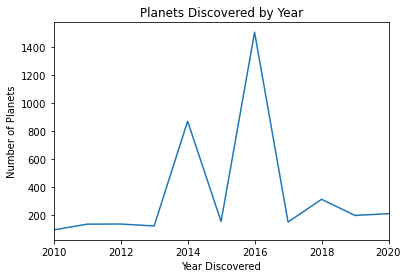

In [6]:
# Creating a line chart for number of planets discovered per year
planet_counts["Number of Planets"].plot()
plt.xlim([2010, 2020])
plt.ylabel("Number of Planets")
plt.title("Planets Discovered by Year")

In the first table you’ll notice that there is a large spike both 2014 and 2016 of planet discoveries. The cause of this in 2014 was the invention of a new technique called “verification by multiplicity”. The cause of 2016 spikes can be attributed to another new method called Bayesian Analysis. Of the 1500+ planets discovered that year, 1200 were discovered over the course of one month day.

In [7]:
# Creating data set for the number of planets by discovery method by year
method = nasa_year_df.groupby(["Year Discovered", "Discovery Method"]).count()
method = method.drop(columns=["Distance from Earth (Parsecs)"])
method = method.loc[2010:2020]
method = method.rename(columns={"Planet Name": "Number of Planets"})
method.head(50)

Number of Planets
Year Discovered Discovery Method                                
2010            Eclipse Timing Variations                      2
                Imaging                                        6
                Microlensing                                   2
                Radial Velocity                               41
                Transit                                       46
2011            Eclipse Timing Variations                      5
                Imaging                                        2
                Microlensing                                   1
                Orbital Brightness Modulation                  2
                Pulsar Timing                                  1
                Radial Velocity                               47
                Transit                                       79
                Transit Timing Variations                      1
2012            Eclipse Timing Variations                      2
                Imaging                                        2
                Microlensing                                   7
                Radial Velocity                               34
                Transit                                       93
                Transit Timing Variations                      1
2013            Astrometry                                     1
                Imaging                                        7
                Microlensing                                   5
                Orbital Brightness Modulation                  1
                Radial Velocity                               32
                Transit                                       79
2014            Imaging                                        2
                Microlensing                                   6
                Orbital Brightness Modulation                  3
                Radial Velocity                               50
                Transit                                      798
                Transit Timing Variations                     12
2015            Eclipse Timing Variations                      1
                Imaging                                        5
                Microlensing                                   4
                Radial Velocity                               47
                Transit                                      100
2016            Imaging                                        2
                Microlensing                                  10
                Pulsation Timing Variations                    1
                Radial Velocity                               49
                Transit                                     1442
                Transit Timing Variations                      1
2017            Eclipse Timing Variations                      2
                Imaging                                        1
                Microlensing                                   9
                Pulsar Timing                                  2
                Radial Velocity                               49
                Transit                                       89
                Transit Timing Variations                      1
2018            Eclipse Timing Variations                      1

Text(0.5, 1.0, 'Planets by Discovery Method by Year')

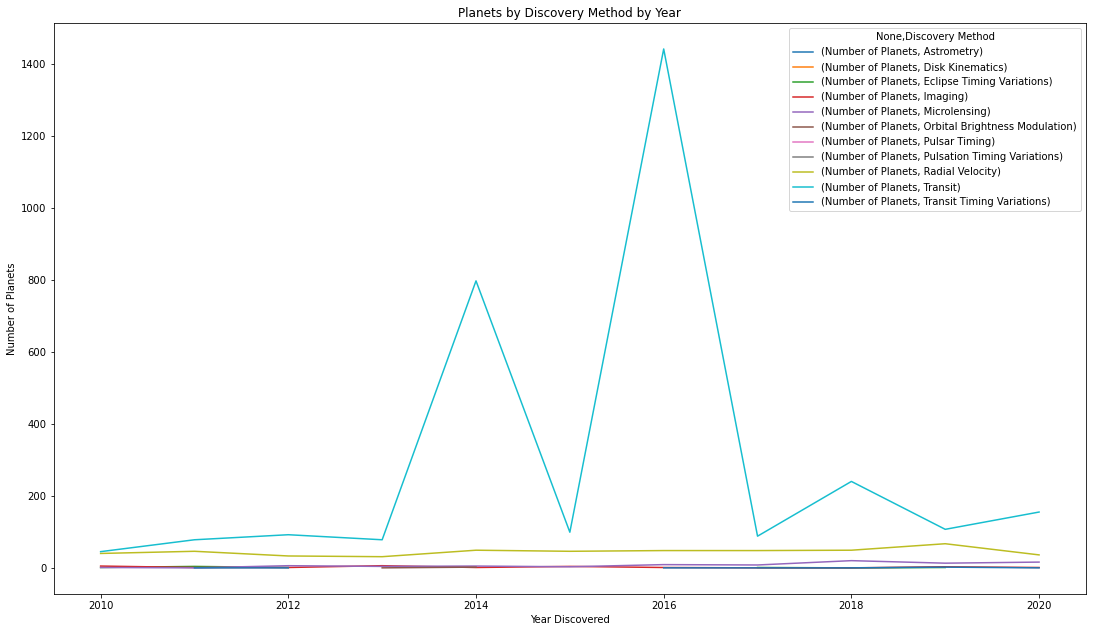

In [8]:
# Creating ine graph of the number of planets by discovery method by year
method.unstack().plot(kind="line")
plt.gcf().set_size_inches(18.5, 10.5)
plt.ylabel("Number of Planets")
plt.title("Planets by Discovery Method by Year")

# Question 2 :This section of the code below will be pulling in the exoplanet data from NASA's API in order to explore the locations of the observatories that discovered the planets.

In [9]:
# Requesting confirmed exoplanets url for facility list
confirmed_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
# Reading the URL as a CSV
facility = pd.read_csv(confirmed_url)
# Keeping only the required variables
facility_df = facility[['pl_name','pl_facility','st_dist']]

In [10]:
# Saving as data frame
df = pd.read_csv("facility_data_locations.csv")
df

,pl_facility,Lat,Long,Country
0,HATNet,36.601309,36.164228,Turkey
1,Kepler,28.282865,76.950927,India
2,Haute-Provence Observatory,43.934786,5.710468,France
3,W. M. Keck Observatory,19.826183,-155.474661,United States
4,Okayama Astrophysical Observatory,34.576269,133.594117,Japan
...,...,...,...,...
56,Atacama Large Millimeter Array (ALMA),-23.023168,-67.753780,Chile
57,Winer Observatory,31.665895,-110.601725,United States
58,Haleakala Observatory,20.708474,-156.256690,United States
59,KOINet,-34.580319,19.351710,South Africa


In [11]:
# Merging the two data sets on facility name
merged_facility_df = pd.merge(facility_df,df, on="pl_facility")
# Dropping any Null Values
merged_facility_clean = df = merged_facility_df.dropna(how='any')
merged_facility_clean

,pl_name,pl_facility,st_dist,Lat,Long,Country
0,HAT-P-19 b,HATNet,215.00,36.601309,36.164228,Turkey
1,HAT-P-20 b,HATNet,70.00,36.601309,36.164228,Turkey
2,HAT-P-21 b,HATNet,279.48,36.601309,36.164228,Turkey
3,HAT-P-22 b,HATNet,81.96,36.601309,36.164228,Turkey
4,HAT-P-23 b,HATNet,368.61,36.601309,36.164228,Turkey
...,...,...,...,...,...,...
4325,HD 97048 b,Atacama Large Millimeter Array (ALMA),185.00,-23.023168,-67.753780,Chile
4326,NY Vir c,Winer Observatory,551.99,31.665895,-110.601725,United States
4327,Wendelstein-1 b,Haleakala Observatory,307.98,20.708474,-156.256690,United States
4328,Wendelstein-2 b,Haleakala Observatory,574.40,20.708474,-156.256690,United States


In [12]:
# Grouping by facility name and then the variables of interest in order to save a data frame with just one observation
# for each facility
merged_facility_count = merged_facility_clean.groupby('pl_facility')['pl_name'].count()
merged_facility_lat = merged_facility_clean.groupby('pl_facility')['Lat'].mean()
merged_facility_long = merged_facility_clean.groupby('pl_facility')['Long'].mean()
group_df = pd.DataFrame({"Planet Count": merged_facility_count, "Lat": merged_facility_lat, "Long": merged_facility_long})
group_df

,Planet Count,Lat,Long
pl_facility,,,
Anglo-Australian Telescope,37,31.675295,-110.952129
Arecibo Observatory,3,18.346504,-66.752873
Atacama Large Millimeter Array (ALMA),1,-23.023168,-67.753780
Bohyunsan Optical Astronomical Observatory,17,36.164908,128.977035
Calar Alto Observatory,11,37.220936,-2.546736
Cerro Tololo Inter-American Observatory,2,-30.168746,-70.806311
European Southern Observatory,2,48.259719,11.670955
Fred Lawrence Whipple Observatory,6,31.675240,-110.951947
Gemini Observatory,9,19.824071,-155.468840


In [13]:
# Calling API key
gmaps.configure(api_key=g_key)

# Setting location and count
locations = group_df[["Lat", "Long"]]
weights = group_df["Planet Count"]

# Configuring map layout
figure_layout = {
    'width': "100%",
    'height': '400px',
    'padding': '1px',
}

fig = gmaps.figure(layout=figure_layout, center=(21, 4), zoom_level=2.0)
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights, dissipating=False)
fig.add_layer(heatmap_layer)

# Setting heatmap intensity and radius
heatmap_layer.max_intensity = 50
heatmap_layer.point_radius = 4

# Displaying heatmap
fig

Figure(layout=FigureLayout(height='400px', padding='1px', width='100%'))

### This heatmap shows the locations of observatories and the size and color of the map represents the number of planets discovered at each observatory.

In [14]:
# Creating a data frame for the top 5 facilities
top_five_facilities = group_df[group_df['Planet Count'] > 97]
top_five_facilities.reset_index()

,pl_facility,Planet Count,Lat,Long
0,Kepler,2391,28.282865,76.950927
1,La Silla Observatory,245,-29.255998,-70.738035
2,SuperWASP,113,36.001643,-78.938186
3,Transiting Exoplanet Survey Satellite (TESS),98,38.995042,-76.852344
4,W. M. Keck Observatory,175,19.826183,-155.474661


Text(0.5, 1.0, 'Top Five Observatories By Number of Exoplanets Discovered')

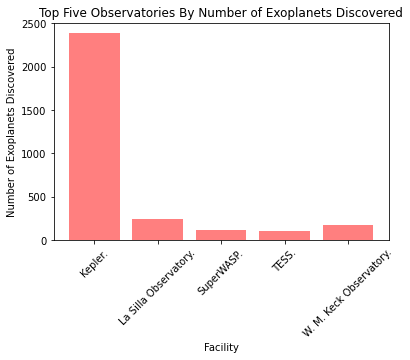

In [15]:
# Creating a bar chart for the top five facilities
Planet_Count = top_five_facilities['Planet Count']
x_axis = np.arange(len(Planet_Count))

plt.bar(x_axis,Planet_Count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Kepler.", "La Silla Observatory.", "SuperWASP.", "TESS.", "W. M. Keck Observatory."], size = 10, rotation=45)

# Labeling the bar chart
plt.xlabel("Facility")
plt.ylabel("Number of Exoplanets Discovered")
plt.title("Top Five Observatories By Number of Exoplanets Discovered")

### This bar graph shows the top 5 observatories by the number of planets discovered.

In [16]:
# Creating a data frame for planets found by Country
merged_country_count = merged_facility_clean.groupby('Country')['pl_name'].count()
country_df = pd.DataFrame({"Planet Count": merged_country_count})
country_df

,Planet Count
Country,
Argentina,1
Australia,2
Chile,322
China,5
England,2
France,51
Germany,10
India,2391
Japan,23


In [17]:
# Creating a dataframe for top 5 countries
top_five_countries = country_df[country_df['Planet Count'] > 50]
top_five_countries

,Planet Count
Country,
Chile,322
France,51
India,2391
Turkey,60
United States,531


Text(0.5, 1.0, 'Top Five Countries By Number of Exoplanets Discovered')

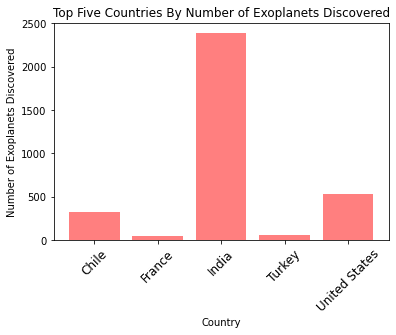

In [18]:
# Creating a bar chart for the top 5 countries
Planet_Count = top_five_countries['Planet Count']
x_axis = np.arange(len(Planet_Count))

plt.bar(x_axis,Planet_Count, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Chile", "France", "India", "Turkey", "United States"], size = 12,rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Exoplanets Discovered")
plt.title("Top Five Countries By Number of Exoplanets Discovered")

### This bar graph shows the top 5 countries in terms of number of planets discovered.

# Question 3: How many planets fall within the ranges given by the PHL data?
### Taking the data provided by the Planetary Habitability Laboratory (PHL), the goal was to find parameters to use to run the other data through in order to properly filter the exoplanets provided by NASA's API. After potentially finding any planets that fit all of the parameters, charts will analyze how the exoplanets are filtered.


In [19]:
# Taking a look at the data base
composite_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars'
api_key = "&apikey="

# Printing url
print(composite_url + api_key)

# Pulling necessary columns from NASA CSV and cleaning data with null values
nasa_original_df = pd.read_csv(composite_url)
nasa_filter_df = nasa_original_df[["fpl_hostname","fpl_letter","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age"]]
nasa_clean_df = nasa_filter_df.dropna(how='any')
nasa_clean_df.count()

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars&apikey=


fpl_hostname    332
fpl_letter      332
fpl_name        332
fpl_orbper      332
fpl_bmasse      332
fpl_rade        332
fpl_dens        332
fpl_eqt         332
fpl_insol       332
fst_optmag      332
fst_teff        332
fst_mass        332
fst_rad         332
fst_age         332
dtype: int64

In [20]:
# Pulling reference data in as a CSV and reading it as a DataFrame
phl = "PHL Habitable Exoplanets.csv"
phldf = pd.read_csv(phl)
phldf.head()

,Name,Type,Mass (ME),Radius (RE),Flux (SE),Teq (K),Period (days),Distance (ly),ESI
0,Teegarden's Star b,M-Warm Terran,1.05,NaN,1.15,264,4.9,12.0,0.95
1,TOI-700 d,M-Warm Terran,NaN,1.14,0.87,246,37.4,101.0,0.93
2,K2-72 e,M-Warm Terran,NaN,1.29,1.11,261,24.2,217.0,0.90
3,TRAPPIST-1 d,M-Warm Subterran,0.41,0.77,1.14,263,4.0,41.0,0.90
4,Kepler-1649 c,M-Warm Terran,NaN,1.06,0.75,237,19.5,301.0,0.90


In [21]:
# Converting Name column in reference data to a list for for loop check
phl_names = phldf["Name"].tolist()
print(phl_names)

["Teegarden's Star b", 'TOI-700 d', 'K2-72 e', 'TRAPPIST-1 d', 'Kepler-1649 c', 'Proxima Cen b', 'GJ 1061 d', 'GJ 1061 c', 'Ross 128 b', 'GJ 273 b', 'TRAPPIST-1 e', 'Kepler-442 b', 'Wolf 1061 c', 'GJ 667 C c', 'GJ 667 C f', 'Kepler-1229 b', 'TRAPPIST-1 f', 'Kepler-62 f', "Teegarden's Star c", 'Kepler-186 f', 'GJ 667 C e', 'tau Cet f', 'TRAPPIST-1 g', 'GJ 682 b', 'Kepler-452 b', 'Kepler-62 e', 'Kepler-1652 b', 'Kepler-1544 b', 'Kepler-296 e', 'Kepler-283 c', 'K2-296 b', 'Kepler-1410 b', 'K2-3 d', 'Kepler-1638 b', 'Kepler-296 f', 'Kepler-440 b', 'Kepler-705 b', 'Kepler-1653 b', 'GJ 832 c', 'Kepler-1606 b', 'Kepler-1090 b', 'Kepler-61 b', 'K2-18 b', 'Kepler-443 b', 'Kepler-1701 b', 'Kepler-22 b', 'LHS 1140 b', 'Kepler-1552 b', 'K2-9 b', 'Kepler-1540 b', 'GJ 180 c', 'Kepler-1632 b', 'Kepler-298 d', 'GJ 163 c', 'HD 40307 g', 'K2-288 B b', 'GJ 3293 d', 'GJ 229 A c', 'Kepler-174 d', 'GJ 357 d']


In [22]:
# Checking to see how many exoplanets in reference data remain in NASA data
phl_name_list = []
for x in phl_names:
    if not (nasa_clean_df.loc[nasa_clean_df["fpl_name"] == x].empty):
        phl_name_list.append(x)
print(len(phl_name_list))

22


In [23]:
# Merging reference data and NASA data
phl_esi_df = phldf[["Name","ESI"]]
nasa_merge_df = pd.merge(nasa_clean_df, phl_esi_df,left_on="fpl_name",right_on="Name",how="left")

# Pulling necessary columns from merged DF
nasa_clean_merge_df = nasa_merge_df[["fpl_hostname","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age","ESI"]]
nasa_clean_merge_df.head(5)

,fpl_hostname,fpl_name,fpl_orbper,fpl_bmasse,fpl_rade,fpl_dens,fpl_eqt,fpl_insol,fst_optmag,fst_teff,fst_mass,fst_rad,fst_age,ESI
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.0,1.28,1.34,1.6,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.0,1.01,0.92,3.2,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.0,1.45,1.30,2.2,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.0,1.13,1.37,2.7,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.0,1.13,1.61,5.3,NaN


In [24]:
nasaphldf = nasa_clean_merge_df.rename(columns={"fpl_hostname":"Host Name", "fpl_name":"Exoplanet Name","fpl_orbper":"Orbital Period (days)","fpl_bmasse":"Planet Mass [Earth mass]","fpl_rade":"Planet Radius [Earth radii]","fpl_dens":"Planet Density (g/cm**3)","fpl_eqt":"Planet Equilibrium Temperature [K]","fpl_insol":"Insolation Flux [Earth flux]","fst_optmag":"Optical Magnitude [mag]","fst_teff":"Effective Temperature [K]","fst_mass":"Stellar Mass [Solar mass]","fst_rad":"Stellar Radius [Solar radii]","fst_age":"Stellar Age [Gyr]","ESI":"Earth Similarity Index (ESI)"})
nasaphldf

,Host Name,Exoplanet Name,Orbital Period (days),Planet Mass [Earth mass],Planet Radius [Earth radii],Planet Density (g/cm**3),Planet Equilibrium Temperature [K],Insolation Flux [Earth flux],Optical Magnitude [mag],Effective Temperature [K],Stellar Mass [Solar mass],Stellar Radius [Solar radii],Stellar Age [Gyr],Earth Similarity Index (ESI)
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.00,1.28,1.34,1.600,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.00,1.01,0.92,3.200,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.00,1.45,1.30,2.200,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.00,1.13,1.37,2.700,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.00,1.13,1.61,5.300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,HATS-38,HATS-38 b,4.375021,23.51942,6.882,0.403,1294.0,464.700,12.411,5732.00,0.89,1.10,11.890,NaN
328,HATS-59,HATS-59 b,5.416081,256.17098,12.621,0.700,1128.0,269.000,13.951,5670.00,1.04,1.04,4.300,NaN
329,HATS-59,HATS-59 c,1422.000000,4036.44100,12.300,11.900,176.0,0.159,13.951,5670.00,1.04,1.04,4.300,NaN
330,V1298 Tau,V1298 Tau b,24.139600,74.90000,10.270,0.380,677.0,35.000,10.116,4962.28,1.10,1.34,0.023,NaN


In [25]:
# Gathering data to be used as proven potential habitable planets by taking 5 major factors and calculating their bounds

# Individually cleaning columns to make the most out of the data that is given
massphl = phldf["Mass (ME)"].dropna(how='any')
radiusphl = phldf["Radius (RE)"].dropna(how='any')

# Converting other 3 columns to be used without cleaning since all data is given
fluxphl = phldf["Flux (SE)"]
teqphl = phldf["Teq (K)"]
orbitphl = phldf["Period (days)"]

# Adding all 5 columns to a variable for for loop and saving list with column names
phlstats = [massphl,radiusphl,fluxphl,teqphl,orbitphl]
phlnames = ["Mass (ME)","Radius (RE)","Flux (SE)","Teq (K)","Period (days)"]

In [26]:
# Calculating the standard deviations for each column to use as guidelines to find potentially habitable planets
# Saving low and high deviations to list to use for for loop later on
index = 0
lowsd = []
highsd = []
for x in phlstats:
    mean = np.mean(x)
    sd = np.std(x)
    print(f"For {phlnames[index]}, roughly 95% of the data is between {round(mean-2*sd,3)} and {round(mean+2*sd,3)}.")
    lowsd.append(mean-2*sd)
    highsd.append(mean+2*sd)
    index += 1
    
print("Planets outside of these deviation limits will not be appended to the potential habitable planet list.")

For Mass (ME), roughly 95% of the data is between -1.395 and 8.812.
For Radius (RE), roughly 95% of the data is between 0.828 and 2.752.
For Flux (SE), roughly 95% of the data is between 0.146 and 1.673.
For Teq (K), roughly 95% of the data is between 184.756 and 300.944.
For Period (days), roughly 95% of the data is between -138.725 and 337.791.
Planets outside of these deviation limits will not be appended to the potential habitable planet list.


In [27]:
# Removing planets that have an ESI because they are already proven to be potentially habitable
rawnasadf = nasaphldf.loc[pd.isnull(nasaphldf['Earth Similarity Index (ESI)'])]
rawnasadf

,Host Name,Exoplanet Name,Orbital Period (days),Planet Mass [Earth mass],Planet Radius [Earth radii],Planet Density (g/cm**3),Planet Equilibrium Temperature [K],Insolation Flux [Earth flux],Optical Magnitude [mag],Effective Temperature [K],Stellar Mass [Solar mass],Stellar Radius [Solar radii],Stellar Age [Gyr],Earth Similarity Index (ESI)
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.00,1.28,1.34,1.600,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.00,1.01,0.92,3.200,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.00,1.45,1.30,2.200,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.00,1.13,1.37,2.700,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.00,1.13,1.61,5.300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,HATS-38,HATS-38 b,4.375021,23.51942,6.882,0.403,1294.0,464.700,12.411,5732.00,0.89,1.10,11.890,NaN
328,HATS-59,HATS-59 b,5.416081,256.17098,12.621,0.700,1128.0,269.000,13.951,5670.00,1.04,1.04,4.300,NaN
329,HATS-59,HATS-59 c,1422.000000,4036.44100,12.300,11.900,176.0,0.159,13.951,5670.00,1.04,1.04,4.300,NaN
330,V1298 Tau,V1298 Tau b,24.139600,74.90000,10.270,0.380,677.0,35.000,10.116,4962.28,1.10,1.34,0.023,NaN


In [28]:
# Cleaning dataframe so it has only the data we are using
nasadf = rawnasadf[["Exoplanet Name","Planet Mass [Earth mass]","Planet Radius [Earth radii]","Insolation Flux [Earth flux]","Planet Equilibrium Temperature [K]","Orbital Period (days)"]]
nasadf

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
0,HAT-P-9 b,238.05467,15.614,931.000,1540.0,3.922811
1,HAT-P-25 b,180.84527,12.722,325.000,1182.0,3.652815
2,HAT-P-29 b,279.69040,13.115,433.000,1271.0,5.723190
3,HAT-P-32 b,216.12440,22.194,1841.000,1836.0,2.150008
4,Kepler-117 b,29.87500,8.059,157.541,984.0,18.795923
...,...,...,...,...,...,...
327,HATS-38 b,23.51942,6.882,464.700,1294.0,4.375021
328,HATS-59 b,256.17098,12.621,269.000,1128.0,5.416081
329,HATS-59 c,4036.44100,12.300,0.159,176.0,1422.000000
330,V1298 Tau b,74.90000,10.270,35.000,677.0,24.139600


In [29]:
# Finding the planets that meet the mass range provided by the standard deviations
massdf = nasadf.loc[(nasadf["Planet Mass [Earth mass]"] <= highsd[0]) & (nasadf["Planet Mass [Earth mass]"] >= lowsd[0])]
massdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
6,Kepler-120 b,8.50,2.15,42.692,576.0,6.312501
7,Kepler-120 c,2.96,1.53,16.625,455.0,12.794585
8,Kepler-125 b,6.21,2.37,33.184,594.0,4.164389
9,Kepler-186 b,1.24,1.07,37.372,579.0,3.886791
10,Kepler-186 c,2.10,1.25,13.980,470.0,7.267302


In [30]:
# Finding the planets that meet the radius range provided by the standard deviations
radiusdf = massdf.loc[(massdf["Planet Radius [Earth radii]"] <= highsd[1]) & (massdf["Planet Radius [Earth radii]"] >= lowsd[1])]
radiusdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
6,Kepler-120 b,8.50,2.15,42.692,576.0,6.312501
7,Kepler-120 c,2.96,1.53,16.625,455.0,12.794585
8,Kepler-125 b,6.21,2.37,33.184,594.0,4.164389
9,Kepler-186 b,1.24,1.07,37.372,579.0,3.886791
10,Kepler-186 c,2.10,1.25,13.980,470.0,7.267302


In [31]:
# Finding the planets that meet the flux range provided by the standard deviations
fluxdf = radiusdf.loc[(radiusdf["Insolation Flux [Earth flux]"] <= highsd[2]) & (radiusdf["Insolation Flux [Earth flux]"] >= lowsd[2])]
fluxdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
132,Kepler-235 e,5.56,2.22,1.330,306.0,46.183669
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764
202,Kepler-1512 b,1.76,1.18,1.600,322.0,20.359726


In [32]:
# Finding the planets that meet the temperature range provided by the standard deviations
teqdf = fluxdf.loc[(fluxdf["Planet Equilibrium Temperature [K]"] <= highsd[3]) & (fluxdf["Planet Equilibrium Temperature [K]"] >= lowsd[3])]
teqdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764


In [33]:
# Finding the planets that meet the orbit range provided by the standard deviations (or all conditions)
orbitdf = teqdf.loc[(teqdf["Orbital Period (days)"] <= highsd[4]) & (teqdf["Orbital Period (days)"] >= lowsd[4])]
orbitdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764


### After running the dataframe through each criteria based on the Planetary Habitability Laboratory (PHL) statistics, two exoplanets remained. Kepler-155 c and Kepler-1455 b were the only two exoplanets to fit all five criteria.


In [34]:
# Generating for loop to see how many conditions an exoplanet meets and appending it to the proper list
cond0,cond1,cond2,cond3,cond4,cond5 = [],[],[],[],[],[]
for index, row in nasadf.iterrows():
    cond = 0
    if (row["Planet Mass [Earth mass]"] >= lowsd[0]) & (row["Planet Mass [Earth mass]"] <= highsd[0]):
        cond += 1
    if (row["Planet Radius [Earth radii]"] >= lowsd[1]) & (row["Planet Radius [Earth radii]"] <= highsd[1]):
        cond += 1
    if (row["Insolation Flux [Earth flux]"] >= lowsd[2]) & (row["Insolation Flux [Earth flux]"] <= highsd[2]):
        cond += 1
    if (row["Planet Equilibrium Temperature [K]"] >= lowsd[3]) & (row["Planet Equilibrium Temperature [K]"] <= highsd[3]):
        cond += 1
    if (row["Orbital Period (days)"] >= lowsd[4]) & (row["Orbital Period (days)"] <= highsd[4]):
        cond += 1
    if cond == 0:
        cond0.append(row["Exoplanet Name"])
    elif cond == 1:
        cond1.append(row["Exoplanet Name"])
    elif cond == 2:
        cond2.append(row["Exoplanet Name"])
    elif cond == 3:
        cond3.append(row["Exoplanet Name"])
    elif cond == 4:
        cond4.append(row["Exoplanet Name"])
    elif cond == 5:
        cond5.append(row["Exoplanet Name"])
        
totalcond = [len(cond0),len(cond1),len(cond2),len(cond3),len(cond4),len(cond5)]
print(totalcond)

[1, 149, 42, 111, 5, 2]


([<matplotlib.patches.Wedge at 0x12e057a9358>,
 [Text(2.699861354302811, 0.027361789820700172, 'Zero'),
  Text(0.09320891320581781, 2.298110549668791, 'One'),
  Text(-2.1801150762179655, -0.7328698755216609, 'Two'),
  Text(0.6885349992243571, -2.194520347329483, 'Three'),
  Text(3.6846208180527054, -0.3370006337866617, 'Four'),
  Text(4.199137326728675, -0.08512174383761073, 'Five')],
 [Text(1.699912704561029, 0.017227793590811218, '0.3%'),
  Text(0.05268329876850571, 1.2989320498127945, '48.1%'),
  Text(-1.232238956123198, -0.4142307992078953, '13.5%'),
  Text(0.3891719560833323, -1.2403810658818817, '35.8%'),
  Text(2.688777353714136, -0.24591938141188824, '1.6%'),
  Text(3.199342725126609, -0.06485466197151293, '0.6%')])

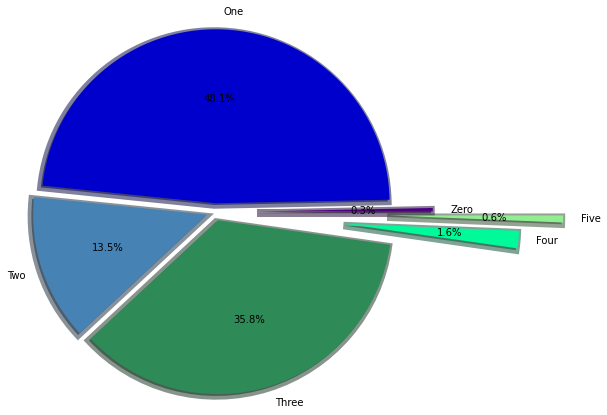

In [35]:
# Making a pie chart to represent the total number of conditions each exoplanet meets
labels = ["Zero","One","Two","Three","Four","Five"]
colors = ["indigo","mediumblue","steelblue","seagreen","mediumspringgreen","lightgreen"]
explode = (0.5,0.1,0.1,0.1,1.5,2)

# Plotting
plt.pie(totalcond,explode=explode,labels=labels,radius=2,colors=colors,autopct="%1.1f%%",shadow=True,wedgeprops={'linewidth':7.5})


### In an effort to see how many total criteria each exoplanet fit, the exoplanets were displayed in a pie chart. As you can see, almost half of the exoplanets met only one criteria. And more exoplanets met three criteria than those that met two. Additionally, only one exoplanet met no criteria at all. 

Text(0.5, 1.0, 'Exoplanets that meet each Criteria')

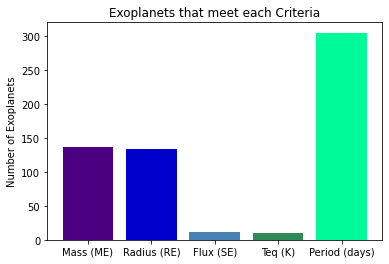

In [36]:
# Gathering number of rows for the number of exoplanets that meet each criteria
accuconddf = [
    (nasadf.loc[(nasadf["Planet Mass [Earth mass]"] <= highsd[0]) & (nasadf["Planet Mass [Earth mass]"] >= lowsd[0])]).shape[0],
    (nasadf.loc[(nasadf["Planet Radius [Earth radii]"] <= highsd[1]) & (nasadf["Planet Radius [Earth radii]"] >= lowsd[1])]).shape[0],
    (nasadf.loc[(nasadf["Insolation Flux [Earth flux]"] <= highsd[2]) & (nasadf["Insolation Flux [Earth flux]"] >= lowsd[2])]).shape[0],
    (nasadf.loc[(nasadf["Planet Equilibrium Temperature [K]"] <= highsd[3]) & (nasadf["Planet Equilibrium Temperature [K]"] >= lowsd[3])]).shape[0],
    (nasadf.loc[(nasadf["Orbital Period (days)"] <= highsd[4]) & (nasadf["Orbital Period (days)"] >= lowsd[4])]).shape[0]]

# Plotting
colors2 = ["indigo","mediumblue","steelblue","seagreen","mediumspringgreen"]
xaxis = np.arange(len(accuconddf))
plt.bar(xaxis,accuconddf,color=colors2)
tick_locations = [value for value in xaxis]
plt.xticks(tick_locations,phlnames)
plt.ylabel("Number of Exoplanets")
plt.title("Exoplanets that meet each Criteria")


### In order to see how many of the exoplanets were being funnelled by each criteria, the totals for each criteria met were taken and displayed into a bar chart. Almost all of the exoplanets seemed to fall within the range that was given for orbital period. When the exoplanets were filtered through Flux and the equilibrium temperature (Teq), however, not many fell within the range. 

# Question 4: The point of this question is to see if there are particular variables that we think correlate most with the ESI. We chose variables that would seem to have most important roles. Using an ESI index and choosing 4 intiial variables, equilibrium temperature, insolation of the planet, mass in relation to earth, and its radius. Two additional variables were proposed, the age of the star and the brightness.

In [37]:
#Isolated the columns needed for the graphs
phl_esi_df = phldf[["Name","ESI"]]
graphs = pd.merge(nasa_filter_df, phl_esi_df,left_on="fpl_name",right_on="Name",how="left")

#Dropped null values to make sure all data was graphed as best as it could be
graphs2 = graphs[["fpl_hostname","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age","ESI"]]
dropped = graphs2.dropna(subset = ['fpl_eqt' , 'ESI'])
dropped1 = graphs2.dropna(subset = ['fpl_insol' , 'ESI'])
dropped2 = graphs2.dropna(subset = ['fpl_bmasse' , 'ESI'])
dropped3 = graphs2.dropna(subset = ['fpl_rade' , 'ESI'])
dropped4 = graphs2.dropna(subset = ['fst_age' , 'ESI'])

In [38]:
#Defined plot linear to condense code for each scatter plot to call later.
def plot_linear(x_values, y_values, title, text_coor):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coor,fontsize=15,color="red")
    print(f"r-value:{rvalue**2}")
    plt.show()

r-value:0.0010782264078862934


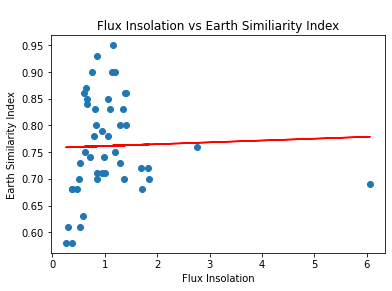

In [39]:
#Scatter plot 1
x_values = dropped1['fpl_insol']
y_values = dropped1['ESI']
plt.xlabel('Flux Insolation')
plt.ylabel('Earth Similarity Index')
plt.title('Flux Insolation vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1))

    This scatter plot is showing that there is not a strong correlation 
    between the insolation of the planet and the ESI
    It does show that these planets have a simniliar flux but still vary in ESI. 

r-value:0.02616417085119024


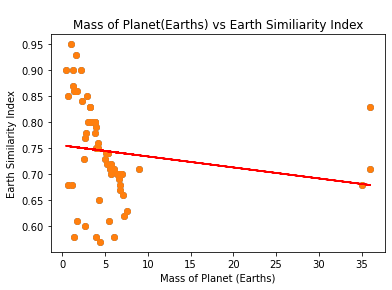

In [40]:
#Scatter Plot 2
x_values = dropped2['fpl_bmasse']
y_values = dropped2['ESI']
plt.scatter(x_values,y_values)
plt.xlabel('Mass of Planet (Earths)')
plt.ylabel('Earth Similarity Index')
plt.title('Mass of Planet(Earths) vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1))

    This scatter plot much like the one above does not show a correlation
    but it does show that several of these planets do share or are 
    close to the same mass

    All of the below T Tests show that there is some statistical significance 
    to our data and are the original 4 variables we proposed to be significant 
    to finding an earth like planet. The bottom two do not see, to gave 
    Significance and are two potential variables we proposed. 

In [41]:
#Defined the T Test variables for the sample 
ttest = nasa_filter_df[nasa_filter_df['fpl_name'].isin(phl_names)]
ttest_clean = ttest.dropna(subset = ['fpl_eqt'])
ttest_mean = ttest_clean['fpl_eqt']

#Defined the T test variables for the entire population
ttesto = nasa_filter_df
ttesto_clean = ttesto.dropna(subset = ['fpl_eqt'])
ttesto_mean = ttesto_clean['fpl_eqt'].mean()
#Ran the T Test
stats.ttest_1samp(ttest_mean, ttesto_mean)

Ttest_1sampResult(statistic=-126.80781328613818, pvalue=2.341821736101518e-41)

In [42]:
#T Test 2
ttest1_clean = ttest.dropna(subset = ['fpl_insol'])
ttest1_mean = ttest1_clean['fpl_insol']

ttesto1_clean = ttesto.dropna(subset = ['fpl_insol'])
ttesto1_mean = ttesto1_clean['fpl_insol'].mean()

stats.ttest_1samp(ttest1_mean, ttesto1_mean)

Ttest_1sampResult(statistic=-2807.3974514967686, pvalue=4.893218605265336e-122)

In [43]:
#T Test 3
ttest2_clean = ttest.dropna(subset = ['fpl_bmasse'])
ttest2_mean = ttest2_clean['fpl_bmasse']

ttesto2_clean = ttesto.dropna(subset = ['fpl_insol'])
ttesto2_mean = ttesto2_clean['fpl_insol'].mean()

stats.ttest_1samp(ttest2_mean, ttesto2_mean)

Ttest_1sampResult(statistic=-375.87220976600395, pvalue=6.314662785997406e-100)

In [44]:
#T Test 4
ttest3_clean = ttest.dropna(subset = ['fpl_rade'])
ttest3_mean = ttest3_clean['fpl_rade']

ttesto3_clean = ttesto.dropna(subset = ['fpl_rade'])
ttesto3_mean = ttesto3_clean['fpl_rade'].mean()

stats.ttest_1samp(ttest3_mean, ttesto3_mean)

Ttest_1sampResult(statistic=-57.06395588587799, pvalue=1.1752410897839319e-52)

In [45]:
#T Test 5
ttest4_clean = ttest.dropna(subset = ['fst_optmag'])
ttest4_mean = ttest4_clean['fst_optmag']

ttesto4_clean = ttesto.dropna(subset = ['fst_optmag'])
ttesto4_mean = ttesto4_clean['fst_optmag'].mean()

stats.ttest_1samp(ttest4_mean, ttesto4_mean)

Ttest_1sampResult(statistic=2.4539188973045363, pvalue=0.017155121531268386)

In [46]:
# T Test 6
ttest5_clean = ttest.dropna(subset = ['fst_age'])
ttest5_mean = ttest5_clean['fst_age']

ttesto5_clean = ttesto.dropna(subset = ['fst_age'])
ttesto5_mean = ttesto5_clean['fst_age'].mean()

stats.ttest_1samp(ttest5_mean, ttesto5_mean)

Ttest_1sampResult(statistic=-0.7601683160728409, pvalue=0.45095055880361734)

# Summary Notes
      1. Kepler-155c and Kepler 1455 b
      2. Found the two most popular years for planet discoveries (2014, 2016)
      3. Kepler Observatory in India has found the most planets
      4. No statistical Significance was found

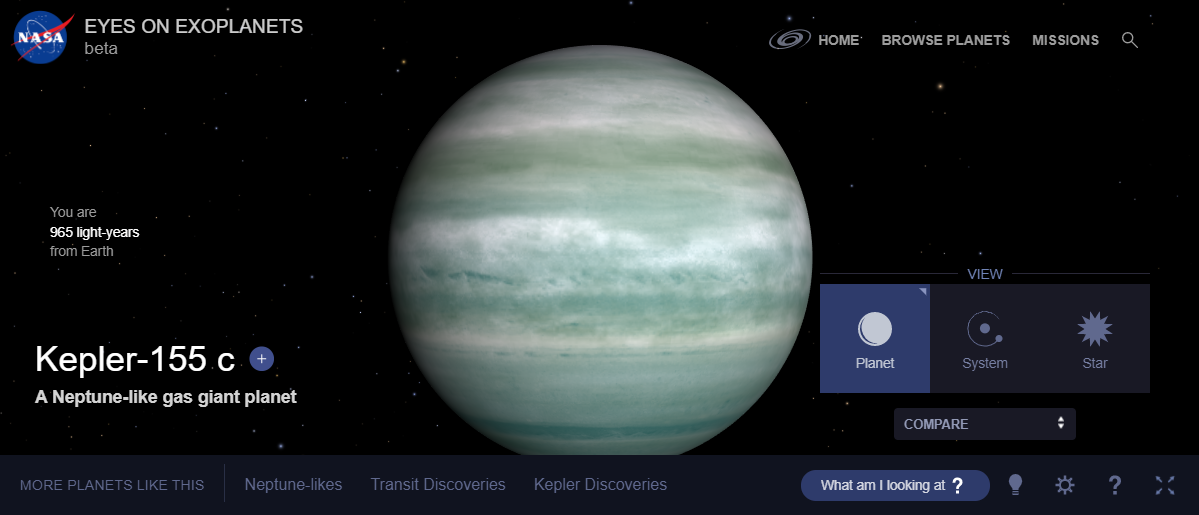

In [47]:
picture1 = 'NASAExoplanets/Kepler155.png'
Image(filename=picture1)

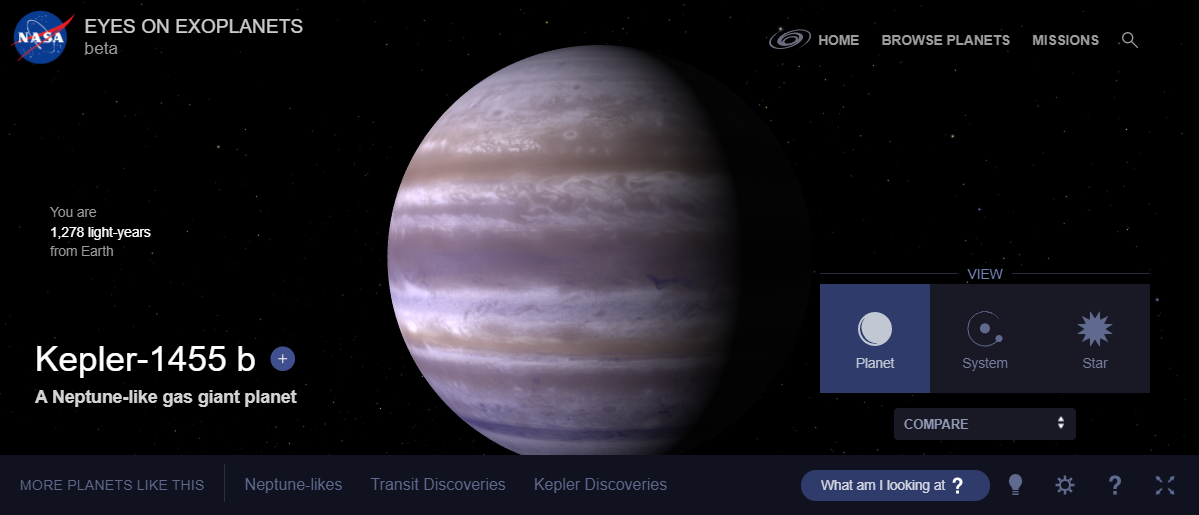

In [48]:
picture2 = 'NASAExoplanets/Kepler1455b.png'
Image(filename=picture2)